# Project: Investigating TMDB Movie Dataset
### Reported By: Sulaiman Handu

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb). This is a great place to start digging into questions with data containing information on the genre, cast, budget, and revenues of several thousand films.
>> The following are list of columns in the TMDb datasets
>>>**id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director,
tagline, keywords, overview, runtime, genres, production_companies, release_date,
vote_count, vote_average, release_year, budget_adj, revenue_adj**




### Question(s) for Analysis
> 1. What are the correlation between the properties of our data?
2. Top directors based on numbers of movies and revenue?
3. Which quarter of the year has the most released movies and how did the revenue perform in eac quarter?

### Importing Libraries

In [141]:
# importing all necessary libraries needed for the analyses 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Data Importation and Inspection 
> The dataset for this project will be imported and preliminary inspections will be done to check for irregularities. 

In [142]:
# Importing data into the notebook
file = r"C:\Users\DELL\Documents\Portfolio Datasets\tmdb-movies.csv"
df = pd.read_csv(file)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [143]:
# Checking some key information about data types and null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [144]:
# the count of null values in each column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [145]:
# Duplicates checks
df.duplicated().sum()

1


### Data Cleaning
>An initial inspection of our dataset shows that we have some redundant columns which will not be needed for the scope of this analysis. The 'tagline', 'keywords', 'imdb_id', 'overview', 'homepage', 'production_companies' are columns that will not be used in the course of this analyses. we also have columns with null values and a duplicate row. we will clean this data to ensure that it ready for analysis. 
 

In [146]:
# removing redundant columns 
df.drop(columns =['tagline', 'keywords', 'imdb_id', 'overview', 'homepage', 'production_companies'], inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [147]:
#checking to confirm where we still have our null value 
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [148]:
#Removing all null values 
df.dropna(inplace = True)
df.shape

(10732, 15)

In [149]:
# we see a duplicate row in our data earlier. Now is time to remove it
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   release_date    10731 non-null  object 
 10  vote_count      10731 non-null  int64  
 11  vote_average    10731 non-null  float64
 12  release_year    10731 non-null  int64  
 13  budget_adj      10731 non-null  float64
 14  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [150]:
# we have to change the data format for our date column to reflect as date.
# ensure datatime library has been imported into your workbook. 
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10731 non-null  int64         
 1   popularity      10731 non-null  float64       
 2   budget          10731 non-null  int64         
 3   revenue         10731 non-null  int64         
 4   original_title  10731 non-null  object        
 5   cast            10731 non-null  object        
 6   director        10731 non-null  object        
 7   runtime         10731 non-null  int64         
 8   genres          10731 non-null  object        
 9   release_date    10731 non-null  datetime64[ns]
 10  vote_count      10731 non-null  int64         
 11  vote_average    10731 non-null  float64       
 12  release_year    10731 non-null  int64         
 13  budget_adj      10731 non-null  float64       
 14  revenue_adj     10731 non-null  float64       
dtypes:

In [151]:
# we want to see a discription of our nemeric data and get statiscal insight form it...
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,1.480365e+07,4.031989e+07,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,91470.508056,1.004804,3.106456e+07,1.176524e+08,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.500000,0.210765,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20323.000000,0.387081,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73948.500000,0.720889,1.600000e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Over half of the values in the revenue and budget column are showing no amount was spent nor receieved. It is quite impossible to have a movie with no budget and no revenue generated. The substitution of mean value will not be a good way to proceed with accurate information due to large number of values to be substituted. We will have to remove these rows because it can potententially affect the credibility of our final result. 

In [152]:
# we will select all rows that have 0 values in the revenue and budget column
no_budrev = df[(df['budget'] == 0) & (df['revenue'] == 0)]
no_budrev.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,2015-06-24,27,5.1,2015,0.0,0.0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,2015-06-12,569,7.7,2015,0.0,0.0
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,2015-12-19,11,5.4,2015,0.0,0.0
100,326359,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,2015-03-09,475,7.0,2015,0.0,0.0
101,254302,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,Ben Wheatley,119,Action|Drama|Science Fiction,2015-09-26,161,5.4,2015,0.0,0.0


In [153]:
#droping the rows that we filtered as no_budrev
df.drop(no_budrev.index, inplace= True)

In [154]:
# we will select all rows that have 0 values in either revenue and budget column
no_bor = df [(df['budget'] == 0) | (df['revenue'] == 0)]
no_bor.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,2015-06-19,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,2015-09-03,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,2015-01-14,481,5.3,2015,2.759999e+07,0.000000e+00


In [155]:
#dropping no_bor
df.drop(no_bor.index, inplace = True)

In [156]:
# let's now see how our descriptive stats looks
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,39885.146791,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249,4.429360e+07,1.372313e+08
std,67248.890597,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642,4.481360e+07,2.162018e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6072.000000,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07
50%,11313.000000,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07
75%,38575.000000,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis
> Our dataset is now clean and ready to use. We have a total of 3854 rows for this analyses. We will be answering all the questions previously stated in the introductory section of the report. This analyses has been broken down into simple steps tp enable readability and easy comprehension. 

### Research Question 1 (What are the correlation beween the properties of our data)
> we will check the corelation between our revenue, budgets, popularity and voting_averages. we like to see if the amount of budget spent on a movie is correlated to it revenue or the popularity. we also see if the popularity of the movie correlates with the revenue generated from it. 

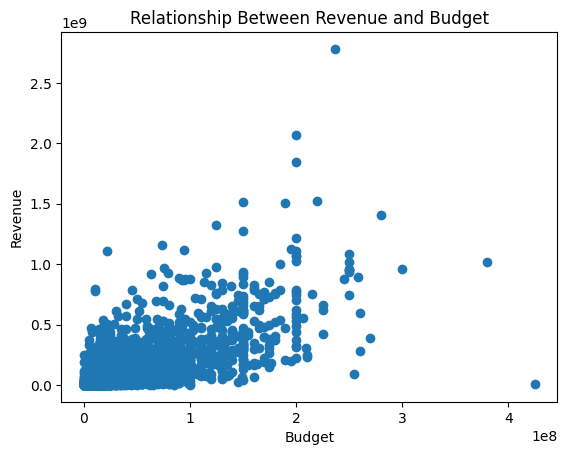

0.6884031904522709

In [157]:
# we wil display the correlation between the budget and the revenue for each of the movie in our data 
plt.scatter(x = 'budget', y = 'revenue', data = df )
plt.title('Relationship Between Revenue and Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()
df['budget'].corr(df['revenue'])

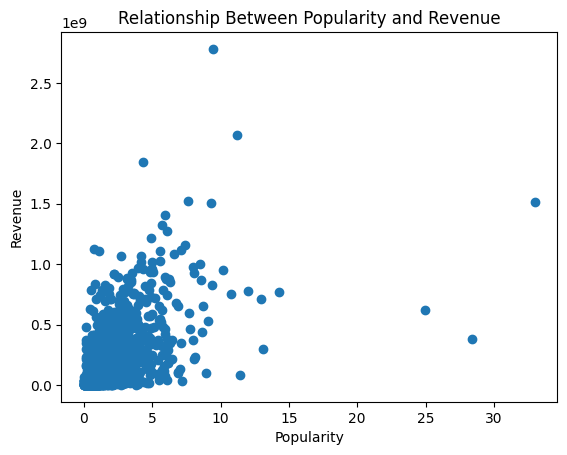

0.6153481634015153

In [158]:
# we wil display the correlation between the popularity and the revenue for each of the movie in our data 
plt.scatter(x = 'popularity', y = 'revenue', data = df )
plt.title('Relationship Between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()
df['popularity'].corr(df['revenue'])

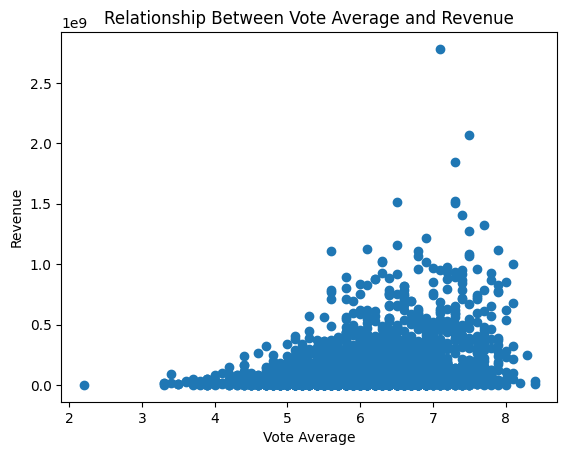

0.2270709224290294

In [159]:
# we wil display the correlation between the vote average and the revenue for each of the movie in our data 
plt.scatter(x = 'vote_average', y = 'revenue', data = df )
plt.title('Relationship Between Vote Average and Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()
df['vote_average'].corr(df['revenue'])

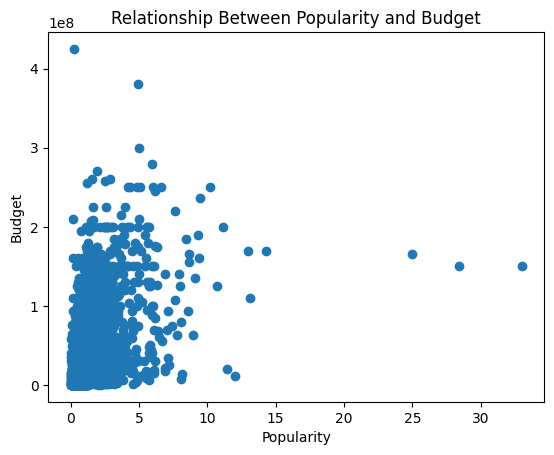

0.44656336904968724

In [160]:
# we wil display the correlation between the popularity and the budget for each of the movie in our data 
plt.scatter(x = 'popularity', y = 'budget', data = df )
plt.title('Relationship Between Popularity and Budget')
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.show()
df['popularity'].corr(df['budget'])

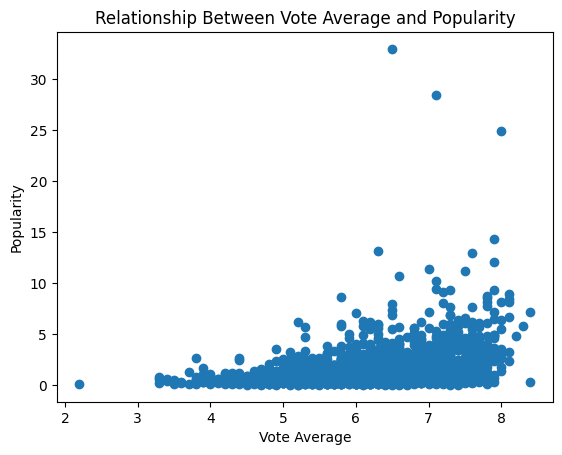

0.3177504922961827

In [161]:
# we wil display the correlation between the popularity and the vote average for each of the movie in our data 
plt.scatter(x = 'vote_average', y = 'popularity', data = df )
plt.title('Relationship Between Vote Average and Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()
df['vote_average'].corr(df['popularity'])

### Research Question 2  (Top directors based on numbers of movies and revenue)
> The analysis of this will be done by examining the average revenue for each director. This will enable us aggregate the revenue on all movies made by each director. 

<AxesSubplot: title={'center': 'Director with the Most Movies'}>

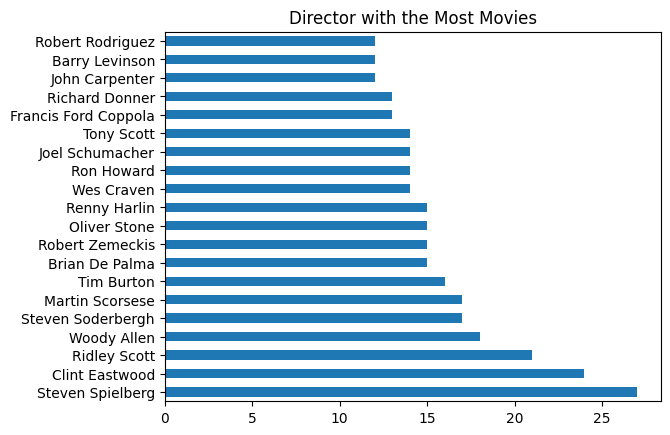

In [209]:
#Lets us group by directors and see the most movies produced by top 20 director
top20_count = df.director.value_counts().head(20)
top20_count.plot(kind = 'barh', title = "Director with the Most Movies")


<AxesSubplot: title={'center': 'Directors With The Highest Average Revenue'}, ylabel='director'>

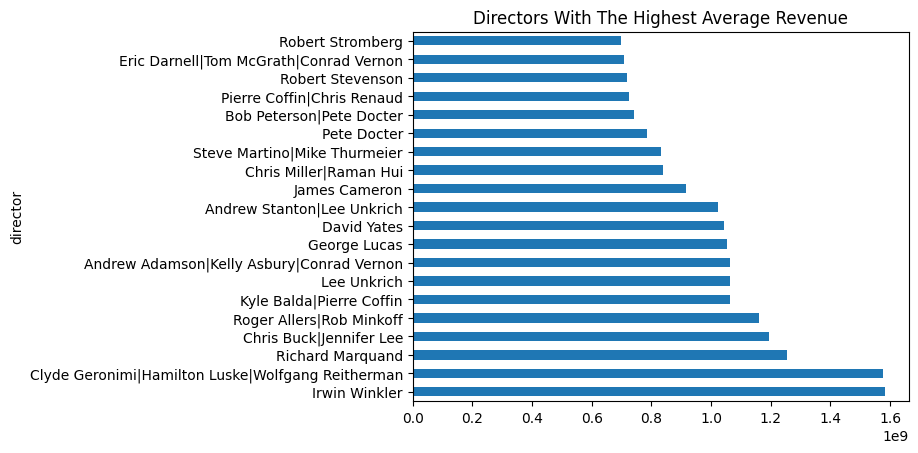

In [207]:
# the top 20 directors based on revenues 
top20_rev = df.groupby('director')['revenue_adj'].mean().sort_values(ascending = False).head(20)
top20_rev.plot(kind = 'barh', title = "Directors With The Highest Average Revenue", xlabel ="")

<AxesSubplot: title={'center': 'Director with the Most Movies'}, ylabel='director'>

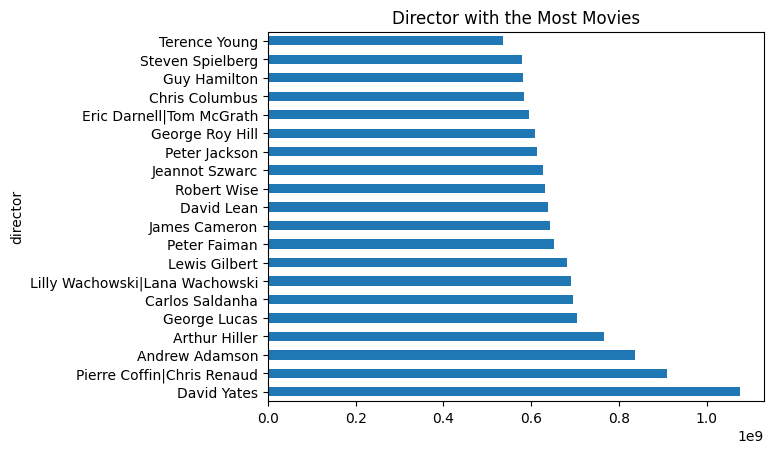

In [208]:
# it seem like most of our values for previous chart are showing unique values 
# lets examine cases where the directors name occured more than once
above1 = df[df.director.duplicated()]
above1.groupby('director')['revenue_adj'].mean().sort_values(ascending = False).head(20).plot(kind = 'barh', title = "Director with the Most Movies")

In [165]:
above1.groupby('director')['revenue'].mean().sort_values(ascending = False)

director
David Yates                       1.073445e+09
Pierre Coffin|Chris Renaud        9.707619e+08
Andrew Adamson                    7.488070e+08
Carlos Saldanha                   6.774211e+08
Lilly Wachowski|Lana Wachowski    5.817940e+08
                                      ...     
Troy Duffy                        3.047100e+04
Steve De Jarnatt                  1.400000e+04
Ti West                           9.221000e+03
Todd Graff                        3.000000e+01
Billy Ray                         2.000000e+00
Name: revenue, Length: 698, dtype: float64

In [166]:
df[df.director == 'David Yates']

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1389,767,5.076472,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,153,Adventure|Fantasy|Family,2009-07-07,3220,7.3,2009,2.541001e+08,9.492765e+08
1923,12444,4.840588,250000000,954305868,Harry Potter and the Deathly Hallows: Part 1,Daniel Radcliffe|Emma Watson|Rupert Grint|Ralp...,David Yates,146,Adventure|Fantasy|Family,2010-10-17,3467,7.4,2010,2.500000e+08,9.543059e+08
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,2011-07-07,3750,7.7,2011,1.211748e+08,1.287184e+09
7388,675,4.878162,150000000,938212738,Harry Potter and the Order of the Phoenix,Daniel Radcliffe|Rupert Grint|Emma Watson|Mich...,David Yates,138,Adventure|Fantasy|Family|Mystery,2007-06-28,3382,7.2,2007,1.577503e+08,9.866889e+08


### Research Question 3 (Which quarter of the year has the most released movies and how did the revenue perform)

In [167]:
# extract the quarter details form the release date
df["quarter"] = df.release_date.dt.quarter

<AxesSubplot: title={'center': 'Numbers of Movies by Quarter'}>

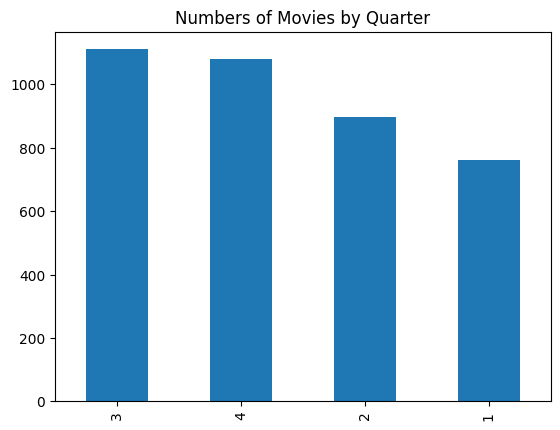

In [168]:
# lets see the count of each quarter
df.quarter.value_counts().plot(kind ='bar', title = 'Numbers of Movies by Quarter')

<AxesSubplot: title={'center': 'Average Revenue for each Quarter'}, xlabel='quarter'>

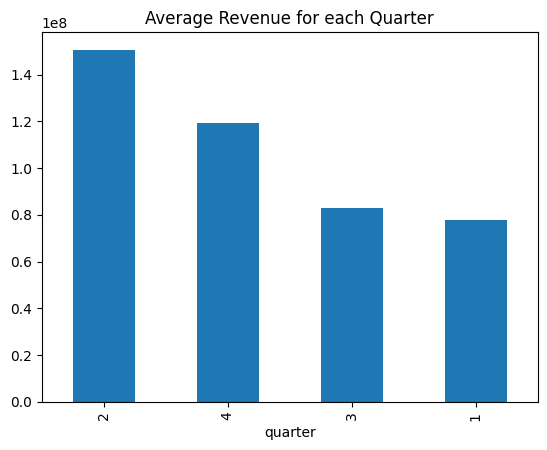

In [169]:
# How did the revenue perform in each quarter
df.groupby('quarter')['revenue'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Average Revenue for each Quarter')

## Further Analysis to Genre and Cast
>We will look into the genre and cast column to get insights from them. They both contain a stroke (|) used as a delimeter between each movie genre and the list of casts. we have to split the values in these columns and create a new dataframe to proceed further with our analysis. 

In [220]:
# Splitting the genres column
new_genre = df[['id', "genres", "revenue_adj" ]]
new_genre['genres'] = new_genre.genres.str.split('|')
df_g = new_genre.explode('genres')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\2547652039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_genre['genres'] = new_genre.genres.str.split('|')


In [221]:
# checking the values
df_g.nunique()

id             3849
genres           20
revenue_adj    3844
dtype: int64

In [222]:
# Splitting the cast columns 
new_cast = df[['id', "cast", "revenue_adj" ]]
new_cast['cast'] = new_cast.cast.str.split('|')
df_c = new_cast.explode('cast')

C:\Users\DELL\AppData\Local\Temp\ipykernel_7156\669110873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cast['cast'] = new_cast.cast.str.split('|')


In [179]:
df_c.nunique()

id             3849
cast           6835
revenue_adj    3844
dtype: int64

>Now that we have successfull seperated the cast and the genre column to new dataframes. we will like to see the most popular genre and the best selling genre. we also like to see the most popular actors and highest grossing actors. 

<AxesSubplot: title={'center': 'The Most Popular Genre'}>

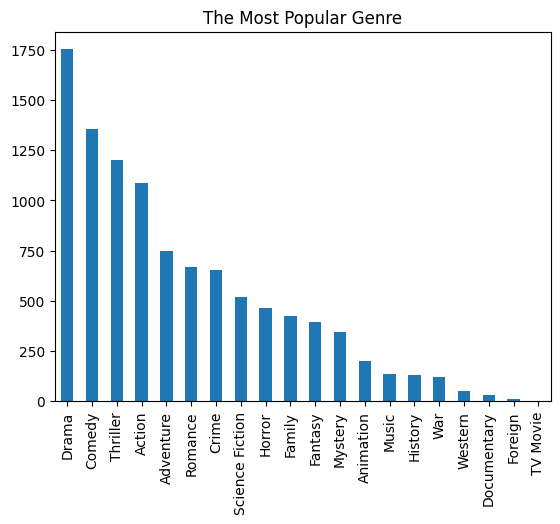

In [186]:
#Most Popular Genres
df_g.genres.value_counts().plot(kind= 'bar', title = "The Most Popular Genre")

<AxesSubplot: title={'center': 'Best Selling Genre'}, ylabel='genres'>

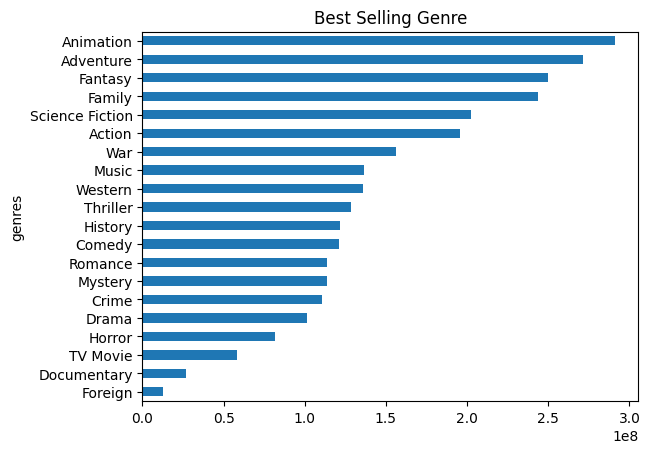

In [187]:
# The best selling Movie genres
df_g.groupby('genres')['revenue_adj'].mean().sort_values().plot(kind= 'barh', title = "Best Selling Genre")

<AxesSubplot: title={'center': 'The Most Popular Actors'}>

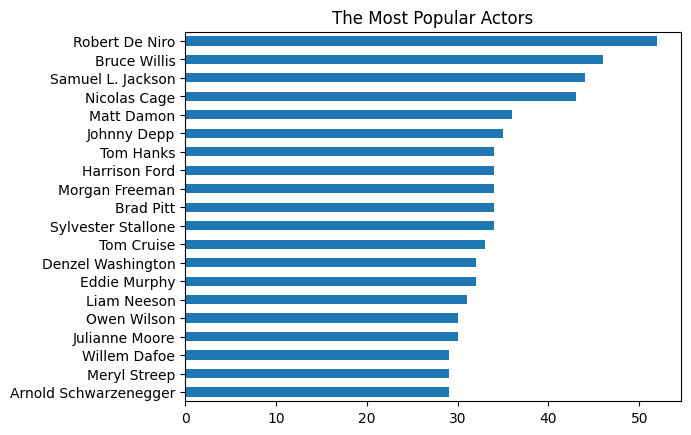

In [217]:
# Most Popular  Actors
df_c.cast.value_counts().nlargest(20).sort_values().plot(kind = 'barh', title = "The Most Popular Actors")

<AxesSubplot: title={'center': 'Highest Grossing Actors'}, ylabel='cast'>

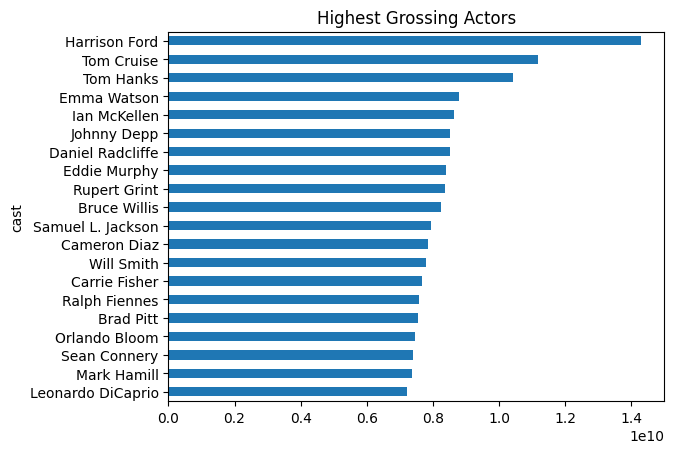

In [219]:
# Highest grossing actors 
df_c.groupby('cast')['revenue_adj'].sum().sort_values(ascending = False).head(20).sort_values().plot(kind= 'barh', title = "Highest Grossing Actors")

<a id='conclusions'></a>
## Conclusions

>  The revenue shows a moderate positive correlation between the budget spent and the popularity index. This means that there is a high likelyhood that most movies with high revenue  also had high budget and their popularity index is also high. The voting_average however, shows a weak positive correlation with the revenue. The voting_average does not show significant similarity with the revenue. The Budget, voting_averages and popularity are also weakly correlated to each other. 

> The directors with the most movies do not have the highest revenue per movie. This could be as a result of the value of money in the 20th century which is quite different from the 21st century because the purchase power of money will change from time to time. David Yates, the director of the movie Harry potter seem to be the most successful director  based on my criteria of multiple movies and highest revenue average of over a billion dollars. 

>When is the best time to realease your movie? It definitely between the 2 to 4 quarter of the year. Fewer movies were released in the 1st quarter of the year and this movies do no generate much revenue as the rest of the quarters. The 3rd and 4th quarters had the most movie release dates but the 2nd quarter recorded the the most revenue on an average. One decisive decision to make  is avoid releasing your movies in the first quarter of the year.

### Limitation 
> A significant percentage(over 60%) of this dataset was unusable due to missing information. 

